# Importing libraries

In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer

# Loading .xls

In [2]:
who = pd.read_csv('Life_Expectancy_Data.xls')

In [3]:
who.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

# Checking size of data frame (columns + rows)

In [4]:
len(who.columns)

22

In [5]:
len(who.index)

2938

# Checking for data types

In [6]:
who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Checking amount of NaN's

In [7]:
nulls_df = pd.DataFrame(round(who.isna().sum()/len(who),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

header_name  percent_nulls
0                           Country           0.00
1                              Year           0.00
2                            Status           0.00
3                  Life expectancy            0.34
4                   Adult Mortality           0.34
5                     infant deaths           0.00
6                           Alcohol           6.60
7            percentage expenditure           0.00
8                       Hepatitis B          18.82
9                          Measles            0.00
10                             BMI            1.16
11               under-five deaths            0.00
12                            Polio           0.65
13                Total expenditure           7.69
14                      Diphtheria            0.65
15                         HIV/AIDS           0.00
16                              GDP          15.25
17                       Population          22.19
18             thinness  1-19 years           1.16
19               thinness 5-9 years           1.16
20  Income composition of resources           5.68
21                        Schooling           5.55

# Replacing NaN with median

In [8]:
who.fillna(who.median(), inplace=True)

/var/folders/z7/h39z8zd55hb3q_stjqd0sqgm0000gn/T/ipykernel_6199/2090037703.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  who.fillna(who.median(), inplace=True)


In [9]:
nulls_df = pd.DataFrame(round(who.isna().sum()/len(who),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

header_name  percent_nulls
0                           Country            0.0
1                              Year            0.0
2                            Status            0.0
3                  Life expectancy             0.0
4                   Adult Mortality            0.0
5                     infant deaths            0.0
6                           Alcohol            0.0
7            percentage expenditure            0.0
8                       Hepatitis B            0.0
9                          Measles             0.0
10                             BMI             0.0
11               under-five deaths             0.0
12                            Polio            0.0
13                Total expenditure            0.0
14                      Diphtheria             0.0
15                         HIV/AIDS            0.0
16                              GDP            0.0
17                       Population            0.0
18             thinness  1-19 years            0.0
19               thinness 5-9 years            0.0
20  Income composition of resources            0.0
21                        Schooling            0.0

# Dropping duplicates

In [10]:
who.drop_duplicates()

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

# Checking for column uniform names

In [11]:
who.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Standardizing column names

In [12]:
who.rename(columns={'Life expectancy ' : 'life expectancy'}, inplace=True)

In [13]:
who.rename(columns={'Measles '  : 'measles'}, inplace=True)

In [14]:
who.rename(columns={' BMI ' : 'bmi'}, inplace=True)

In [15]:
who.rename(columns={'under-five deaths ' : 'under-five deaths'}, inplace=True)

In [16]:
who.rename(columns={'Diphtheria ' : 'diphtheria'}, inplace=True)

In [17]:
who.rename(columns={' HIV/AIDS' : 'hiv/aids'}, inplace=True)

In [18]:
who.rename(columns={' thinness  1-19 years' : 'thinness 1-19 years'}, inplace=True)

In [19]:
who.rename(columns={' thinness 5-9 years' : 'thinness 5-9 years'}, inplace=True)

In [20]:
who.columns= who.columns.str.lower()

In [21]:
who.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

# Standardizing country names

In [22]:
who['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [23]:
who.replace('Brunei Darussalam', 'Brunei', inplace=True)

In [24]:
who.replace('Bolivia (Plurinational State of)', 'Bolivia', inplace=True)

In [25]:
who.replace('Cabo Verde', 'Cape Verde', inplace=True)

In [26]:
who.replace("Democratic People's Republic of Korea", "North Korea", inplace=True)

In [27]:
who.replace("Democratic Republic of the Congo", "Congo", inplace=True)

In [28]:
who.replace('Iran (Islamic Republic of)', 'Iran', inplace=True)

In [29]:
who.replace("Lao People's Democratic Republic", "Laos", inplace=True)

In [30]:
who.replace("Micronesia (Federated States of)", "Micronesia", inplace=True)

In [31]:
who.replace("Republic of Korea", "South Republic of Korea", inplace=True)

In [32]:
who.replace("Republic of Moldova", "Moldova", inplace=True)

In [33]:
who.replace("Russian Federation", "Russia", inplace=True)

In [34]:
who.replace("Syrian Arab Republic", "Syria", inplace=True)

In [35]:
who.replace("The former Yugoslav republic of Macedonia", "Macedonia", inplace=True)

In [36]:
who.replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom", inplace=True)

In [37]:
who.replace("United Republic of Tanzania", "Tanzania", inplace=True)

In [38]:
who.replace("United States of America", "America", inplace=True)

In [39]:
who.replace("America", "United States", inplace=True)

In [40]:
who.replace("Venezuela (Bolivarian Republic of)", "Venezuela", inplace=True)

In [41]:
who.replace("Viet Nam", "Vietnam", inplace=True)

In [42]:
who['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', "Côte d'Ivoire",
       'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'North Korea', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
  

# Pairplot for pairwise feature correlation

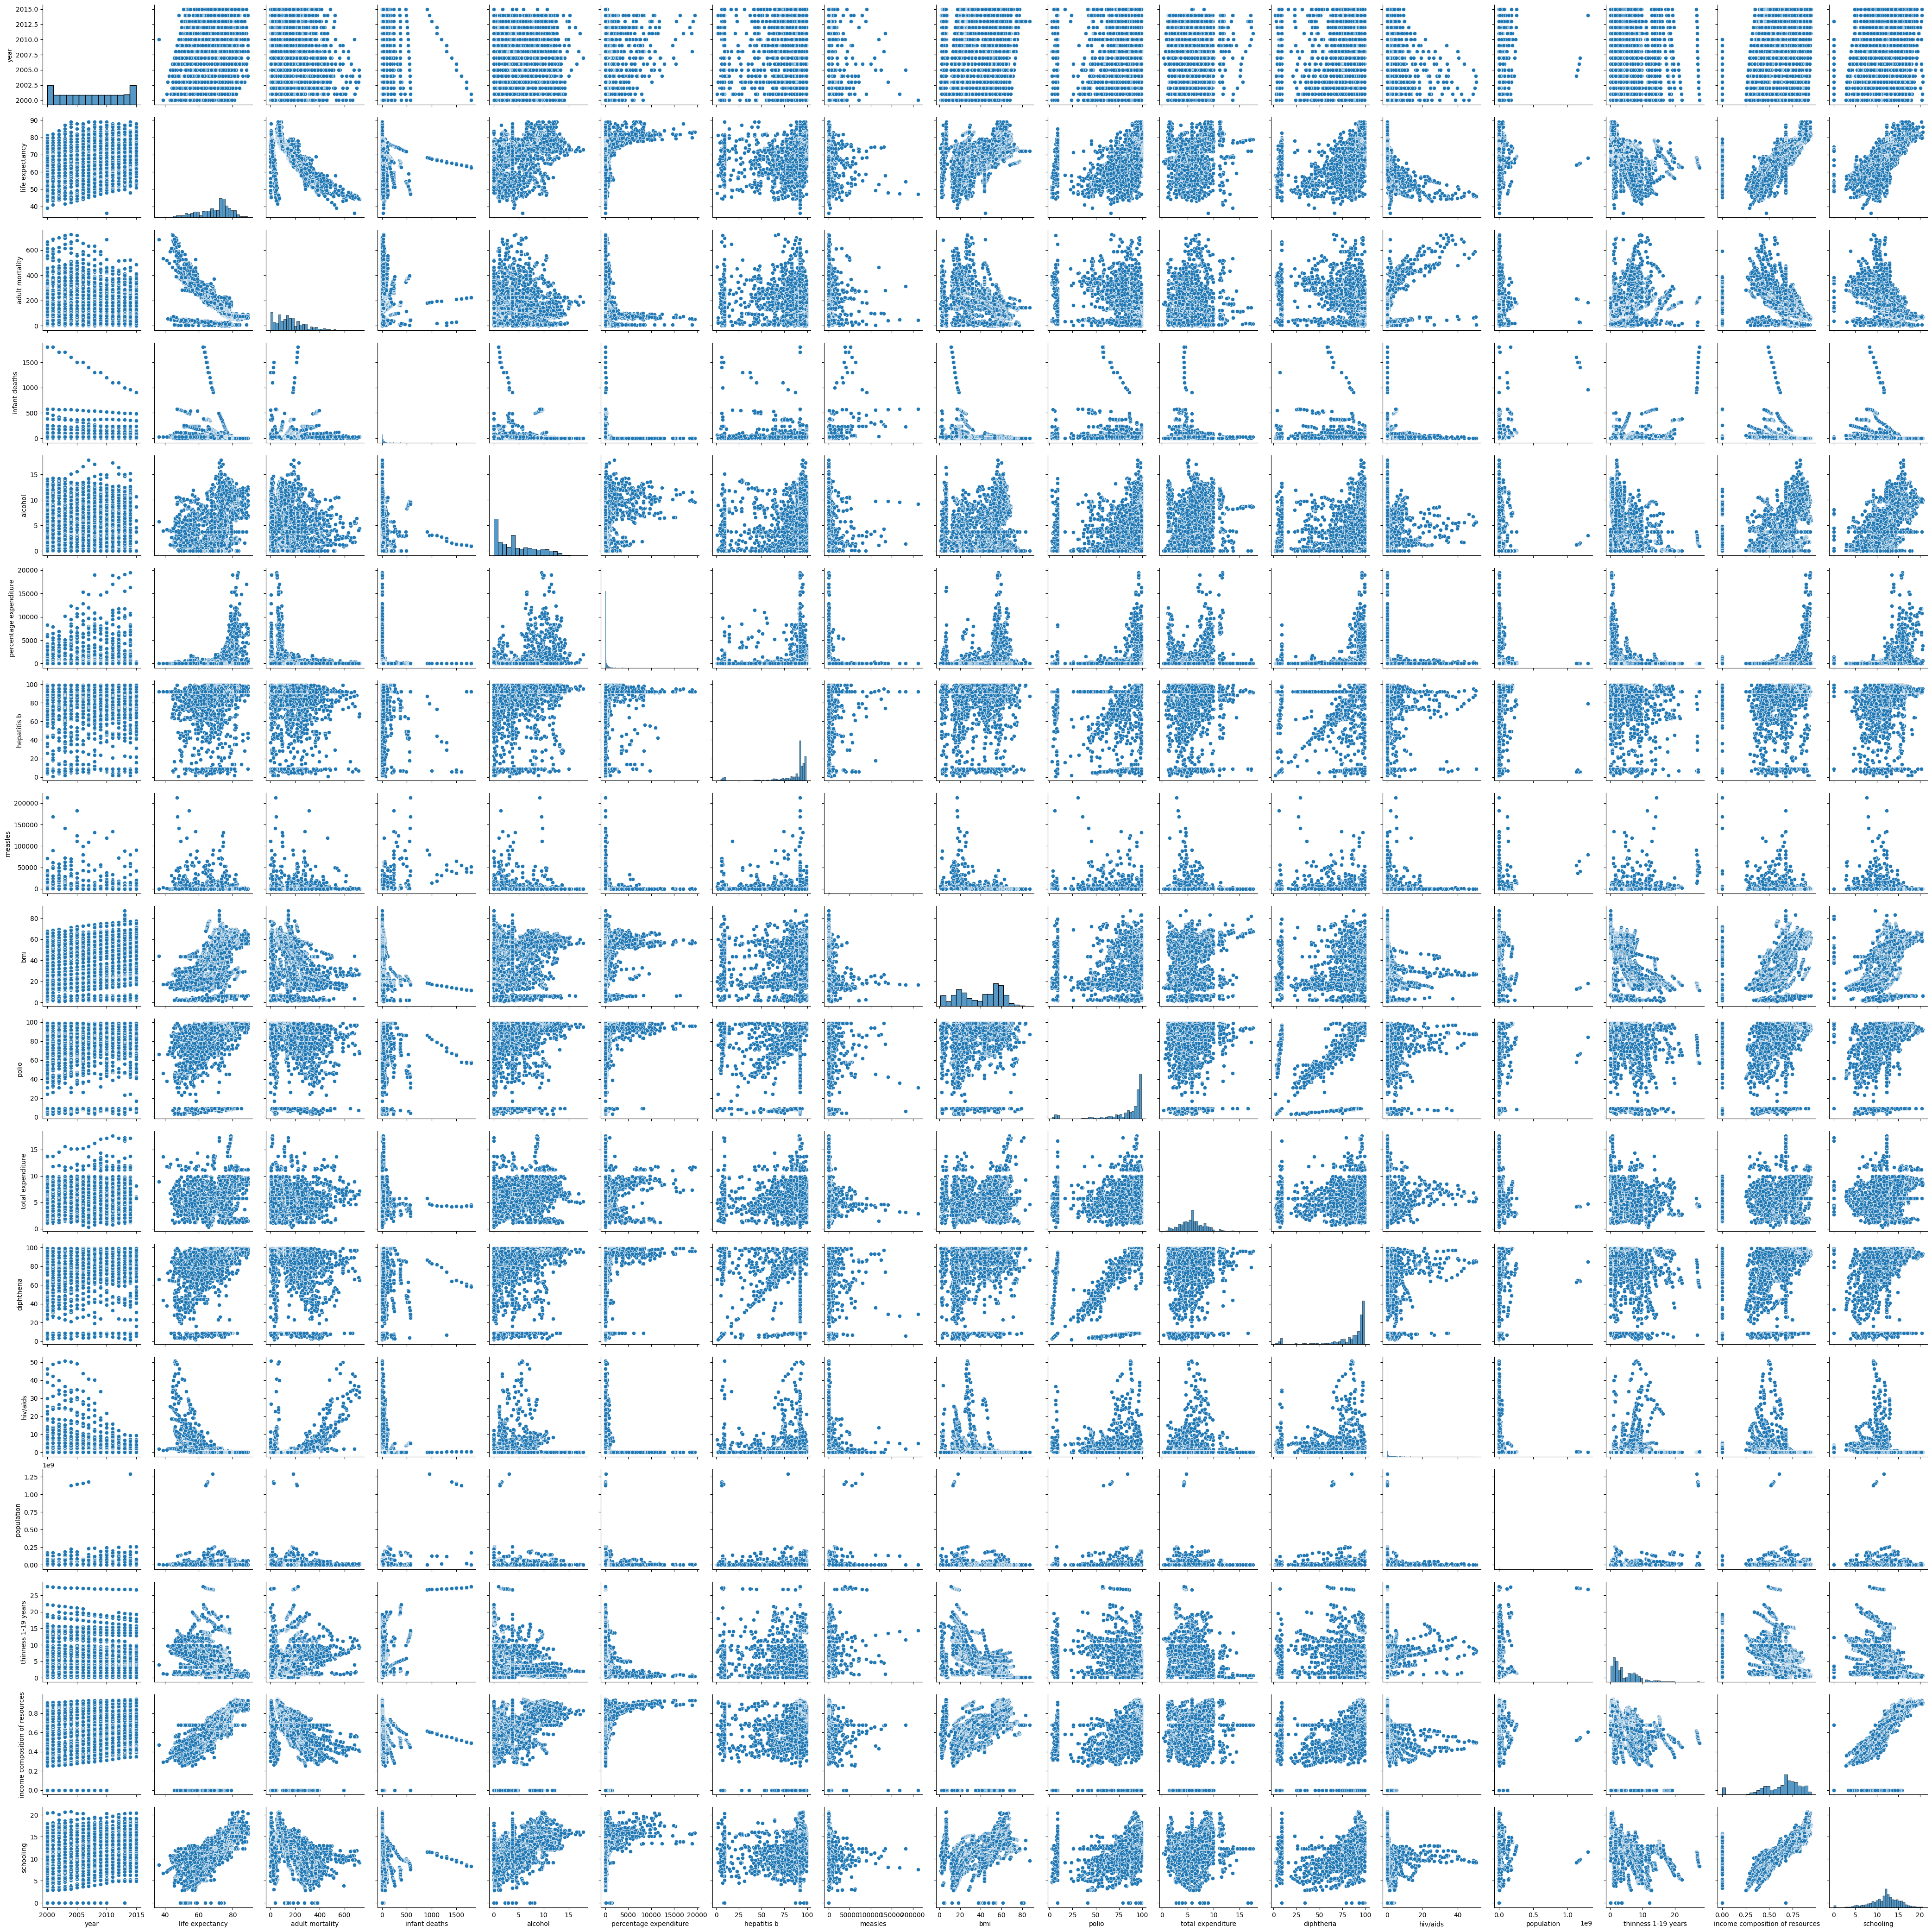

In [127]:
sns.pairplot(who)

# Histograms for distribution of numerical features

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'life expectancy'}>,
        <AxesSubplot:title={'center':'adult mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>],
       [<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'hepatitis b'}>,
        <AxesSubplot:title={'center':'measles'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'polio'}>,
        <AxesSubplot:title={'center':'total expenditure'}>,
        <AxesSubplot:title={'center':'diphtheria'}>],
       [<AxesSubplot:title={'center':'hiv/aids'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'thinness 1-19 years'}>,
        <AxesSubplot:title={'center':'income composition of resources'}>],
       [<AxesSubplot:title={'center':'schooling'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

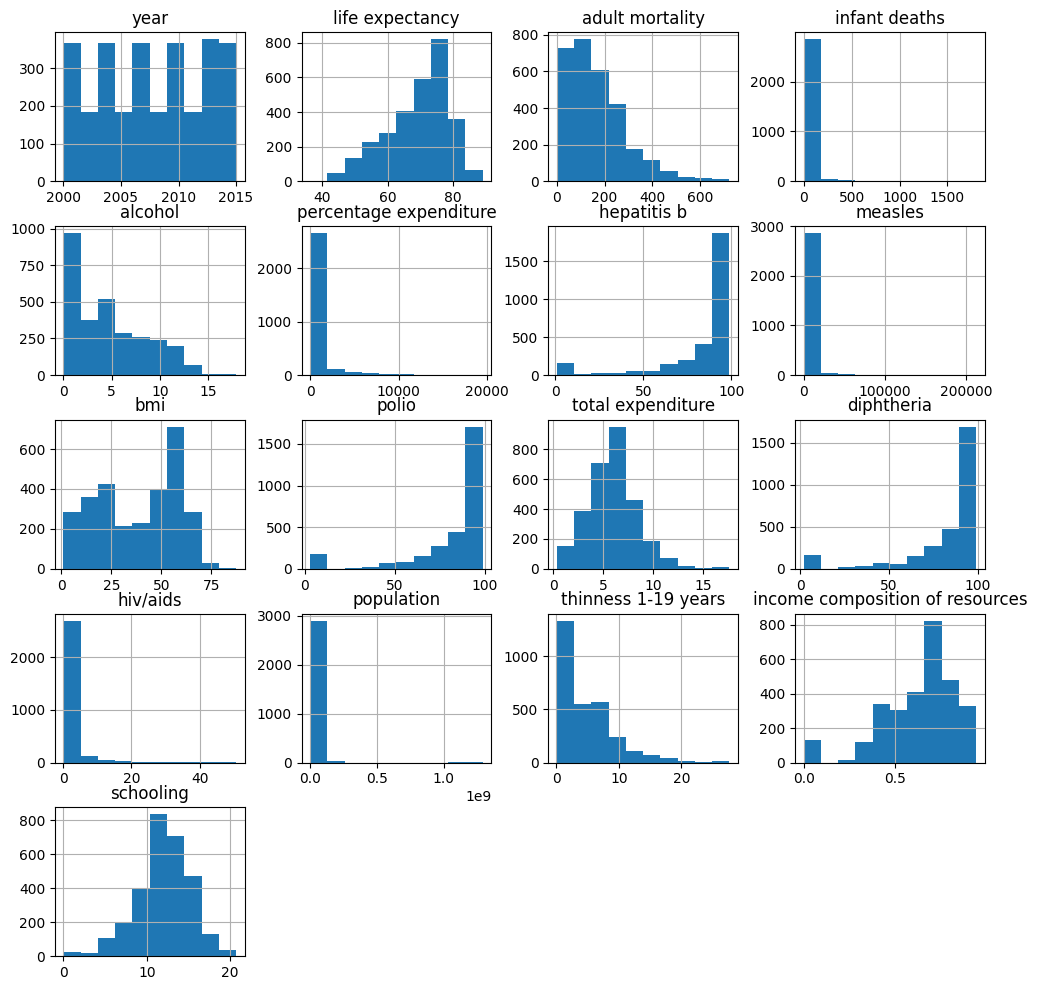

In [128]:
who.hist(figsize=(12,12))

# Checking skewness of dataframe

In [43]:
who.skew(axis = 0, skipna = False)

/var/folders/z7/h39z8zd55hb3q_stjqd0sqgm0000gn/T/ipykernel_6199/1374744912.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  who.skew(axis = 0, skipna = False)


year                               -0.006409
life expectancy                    -0.642391
adult mortality                     1.177899
infant deaths                       9.786963
alcohol                             0.649578
percentage expenditure              4.652051
hepatitis b                        -2.281697
measles                             9.441332
bmi                                -0.229157
under-five deaths                   9.495065
polio                              -2.108909
total expenditure                   0.661108
diphtheria                         -2.083566
hiv/aids                            5.396112
gdp                                 3.543756
population                         17.972837
thinness 1-19 years                 1.729496
thinness 5-9 years                  1.795694
income composition of resources    -1.212526
schooling                          -0.635052
dtype: float64

# Building correlation heatmap

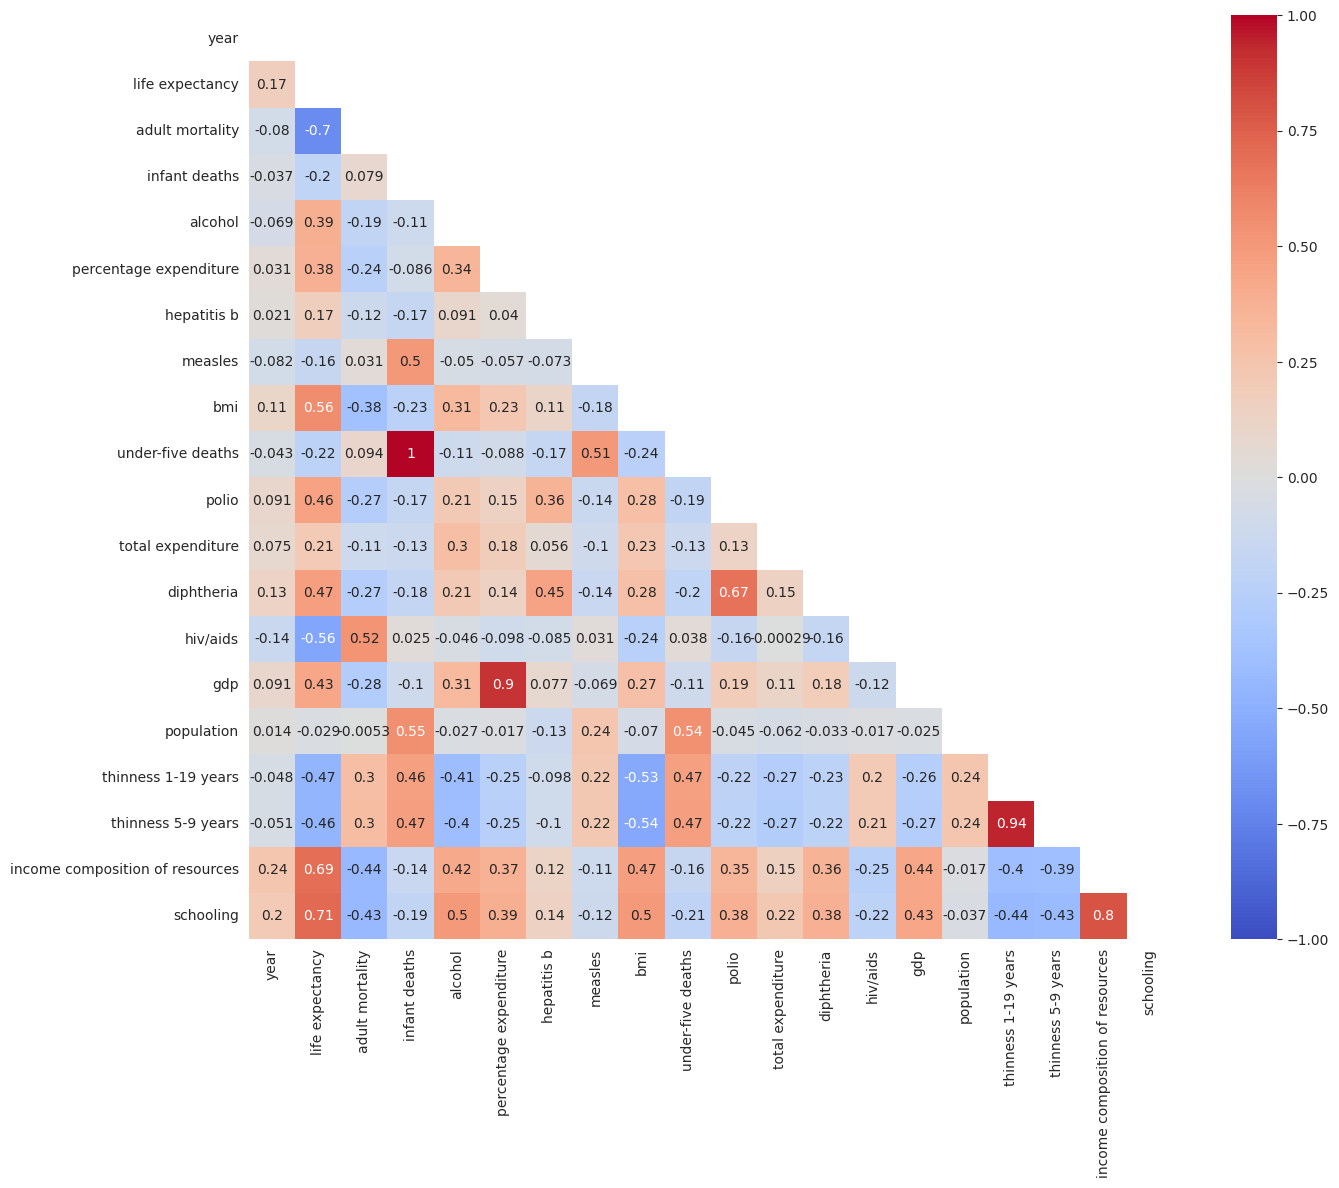

In [44]:
corr = who.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)





# Identifying highly correlated columns

In [45]:
corr_matrix=who.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.80)]



['under-five deaths', 'gdp', 'thinness 5-9 years']

# Dropping highly correlated columns

In [46]:
who.drop(['under-five deaths', 'gdp', 'thinness 5-9 years'],axis=1,inplace=True)

# Dividing categoricals/numericals

In [47]:
who_categoricals = pd.concat([who['country'], who['status']], axis = 1)

In [48]:
who_categoricals

country      status
0     Afghanistan  Developing
1     Afghanistan  Developing
2     Afghanistan  Developing
3     Afghanistan  Developing
4     Afghanistan  Developing
...           ...         ...
2933     Zimbabwe  Developing
2934     Zimbabwe  Developing
2935     Zimbabwe  Developing
2936     Zimbabwe  Developing
2937     Zimbabwe  Developing

[2938 rows x 2 columns]

In [49]:
who_numericals = who._get_numeric_data()

In [50]:
who_numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   life expectancy                  2938 non-null   float64
 2   adult mortality                  2938 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   alcohol                          2938 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   hepatitis b                      2938 non-null   float64
 7   measles                          2938 non-null   int64  
 8   bmi                              2938 non-null   float64
 9   polio                            2938 non-null   float64
 10  total expenditure                2938 non-null   float64
 11  diphtheria                       2938 non-null   float64
 12  hiv/aids            

# Defining X1, y1 (Linear regression, w/o Hot Coding)

In [51]:
X1 = who_numericals

In [52]:
X1 = X1.drop(['life expectancy'], axis=1)

In [53]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   adult mortality                  2938 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   alcohol                          2938 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   hepatitis b                      2938 non-null   float64
 6   measles                          2938 non-null   int64  
 7   bmi                              2938 non-null   float64
 8   polio                            2938 non-null   float64
 9   total expenditure                2938 non-null   float64
 10  diphtheria                       2938 non-null   float64
 11  hiv/aids                         2938 non-null   float64
 12  population          

In [54]:
y1 = who_numericals['life expectancy']

In [55]:
y1

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: life expectancy, Length: 2938, dtype: float64

# Data splitting X1, y1

In [56]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

X1_train = pd.DataFrame(X1_train, columns=X1.columns)
X1_test  = pd.DataFrame(X1_test, columns=X1.columns)

# Standardizing Data X1, y1

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'adult mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'hepatitis b'}>,
        <AxesSubplot:title={'center':'measles'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'polio'}>,
        <AxesSubplot:title={'center':'total expenditure'}>,
        <AxesSubplot:title={'center':'diphtheria'}>,
        <AxesSubplot:title={'center':'hiv/aids'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'thinness 1-19 years'}>,
        <AxesSubplot:title={'center':'income composition of resources'}>,
        <AxesSubplot:title={'center':'schooling'}>]], dtype=object)

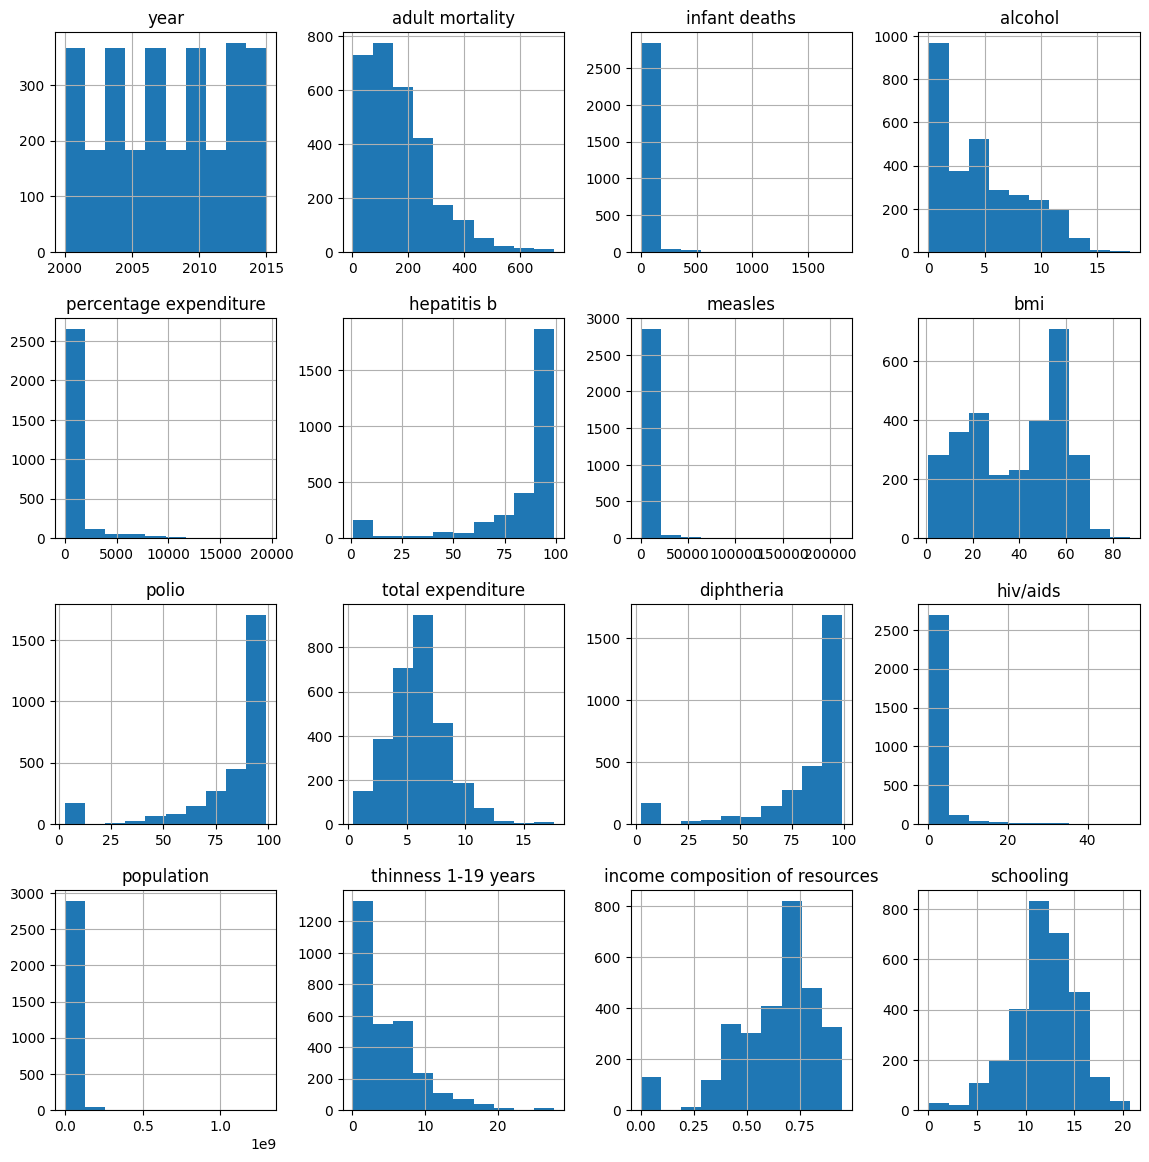

In [57]:
 X1.hist(figsize=(14,14))

In [58]:
std_scaler=StandardScaler().fit(X1_train)   

X1_train_scaled=std_scaler.transform(X1_train)



In [59]:
X1_test_scaled=std_scaler.transform(X1_test)

# Fitting model (Linear Regression, X1, y1)



In [60]:
model1=LinearRegression()    
model1.fit(X1_train_scaled, y1_train)

LinearRegression()

# Feature importance (Linear Regression, X1, y1, w/o Hot Coding)


In [191]:
feature_names1 = X1_train.columns
feature_names1 = list(feature_names1)

In [197]:
df6 = pd.DataFrame(list(zip(feature_names1, model1.coef_)))
df6.columns = ['columns_name', 'score_feature_importance']
df6.sort_values(by=['score_feature_importance'], ascending = False)

columns_name  score_feature_importance
15                        schooling                  2.193974
14  income composition of resources                  1.494520
10                       diphtheria                  1.114422
7                               bmi                  0.833383
8                             polio                  0.735259
4            percentage expenditure                  0.632990
3                           alcohol                  0.282443
9                 total expenditure                  0.130447
12                       population                  0.100400
0                              year                 -0.042552
2                     infant deaths                 -0.096315
13              thinness 1-19 years                 -0.344733
6                           measles                 -0.442638
5                       hepatitis b                 -0.461683
11                         hiv/aids                 -2.477202
1                   adult mortality                 -2.710664

# Making prediction (X1, y1)

In [63]:
y1_pred=model1.predict(X1_test_scaled)   

y1_pred_train=model1.predict(X1_train_scaled)

# Evaluating model performance (X1, y1)

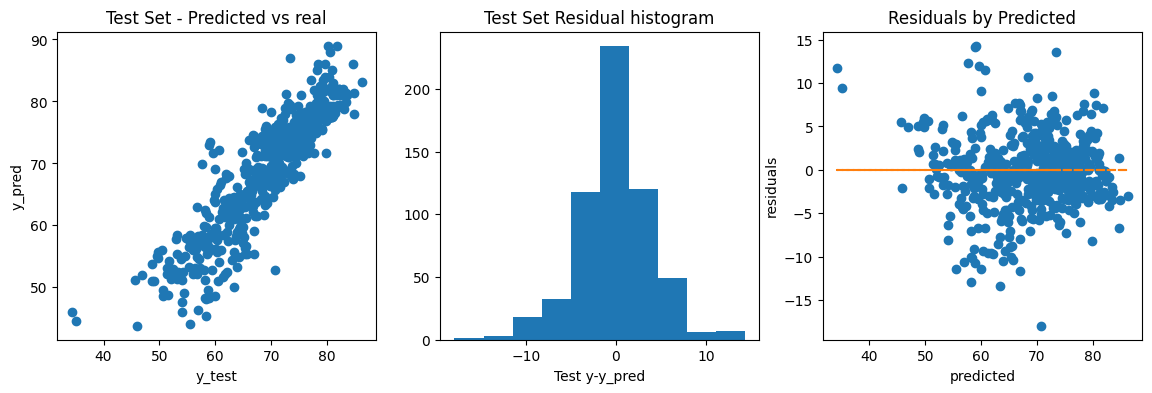

In [64]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y1_pred, y1_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y1_test - y1_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y1_pred,y1_test - y1_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y1_pred)),linestyle='dashed')

# Error metrics (X1, y1)

In [65]:
print(mse(y1_test,y1_pred))
print(mae(y1_test,y1_pred))

16.521604785204133
2.9599688273422817


In [66]:
R2_1=r2_score(y1_test,y1_pred)
R2_1

0.8093676353600016

# Cross validation (X1, y1)

In [220]:
scores1=cross_val_score(model1, X1_train_scaled, y1_train, cv = 5)
scores1

array([0.80963666, 0.8243756 , 0.7787869 , 0.78071359, 0.80624046])

In [221]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

0.80 accuracy with a standard deviation of 0.02


# Hot Coding coding categoricals

In [69]:
who_categoricals['status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [70]:
len(who_categoricals['status'].unique())

2

In [71]:
hc_who_categoricals = pd.get_dummies(who_categoricals[['status']], drop_first=True)
hc_who_categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   status_Developing  2938 non-null   uint8
dtypes: uint8(1)
memory usage: 3.0 KB


In [72]:
hc_who_categoricals['status_Developing'].unique()

array([1, 0], dtype=uint8)

# Defining X2, y2 (Linear regression, w/ Hot Coding)

In [73]:
X2 = who_numericals

In [74]:
X2

year  life expectancy  adult mortality  infant deaths  alcohol  \
0     2015             65.0            263.0             62     0.01   
1     2014             59.9            271.0             64     0.01   
2     2013             59.9            268.0             66     0.01   
3     2012             59.5            272.0             69     0.01   
4     2011             59.2            275.0             71     0.01   
...    ...              ...              ...            ...      ...   
2933  2004             44.3            723.0             27     4.36   
2934  2003             44.5            715.0             26     4.06   
2935  2002             44.8             73.0             25     4.43   
2936  2001             45.3            686.0             25     1.72   
2937  2000             46.0            665.0             24     1.68   

      percentage expenditure  hepatitis b  measles   bmi  polio  \
0                  71.279624         65.0     1154  19.1    6.0   
1                  73.523582         62.0      492  18.6   58.0   
2                  73.219243         64.0      430  18.1   62.0   
3                  78.184215         67.0     2787  17.6   67.0   
4                   7.097109         68.0     3013  17.2   68.0   
...                      ...          ...      ...   ...    ...   
2933                0.000000         68.0       31  27.1   67.0   
2934                0.000000          7.0      998  26.7    7.0   
2935                0.000000         73.0      304  26.3   73.0   
2936                0.000000         76.0      529  25.9   76.0   
2937                0.000000         79.0     1483  25.5   78.0   

      total expenditure  diphtheria  hiv/aids  population  \
0                  8.16        65.0       0.1  33736494.0   
1                  8.18        62.0       0.1    327582.0   
2                  8.13        64.0       0.1  31731688.0   
3                  8.52        67.0       0.1   3696958.0   
4                  7.87        68.0       0.1   2978599.0   
...                 ...         ...       ...         ...   
2933               7.13        65.0      33.6  12777511.0   
2934               6.52        68.0      36.7  12633897.0   
2935               6.53        71.0      39.8    125525.0   
2936               6.16        75.0      42.1  12366165.0   
2937               7.10        78.0      43.5  12222251.0   

      thinness 1-19 years  income composition of resources  schooling  
0                    17.2                            0.479       10.1  
1                    17.5                            0.476       10.0  
2                    17.7                            0.470        9.9  
3                    17.9                            0.463        9.8  
4                    18.2                            0.454        9.5  
...                   ...                              ...        ...  
2933                  9.4                            0.407        9.2  
2934                  9.8                            0.418        9.5  
2935                  1.2                            0.427       10.0  
2936                  1.6                            0.427        9.8  
2937                 11.0                            0.434        9.8  

[2938 rows x 17 columns]

In [75]:
X2 = pd.concat([X2, hc_who_categoricals], axis=1)

In [76]:
X2.columns

Index(['year', 'life expectancy', 'adult mortality', 'infant deaths',
       'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'polio', 'total expenditure', 'diphtheria', 'hiv/aids', 'population',
       'thinness 1-19 years', 'income composition of resources', 'schooling',
       'status_Developing'],
      dtype='object')

In [77]:
X2.drop(['life expectancy'], axis=1, inplace=True) 

In [78]:
X2

year  adult mortality  infant deaths  alcohol  percentage expenditure  \
0     2015            263.0             62     0.01               71.279624   
1     2014            271.0             64     0.01               73.523582   
2     2013            268.0             66     0.01               73.219243   
3     2012            272.0             69     0.01               78.184215   
4     2011            275.0             71     0.01                7.097109   
...    ...              ...            ...      ...                     ...   
2933  2004            723.0             27     4.36                0.000000   
2934  2003            715.0             26     4.06                0.000000   
2935  2002             73.0             25     4.43                0.000000   
2936  2001            686.0             25     1.72                0.000000   
2937  2000            665.0             24     1.68                0.000000   

      hepatitis b  measles   bmi  polio  total expenditure  diphtheria  \
0            65.0     1154  19.1    6.0               8.16        65.0   
1            62.0      492  18.6   58.0               8.18        62.0   
2            64.0      430  18.1   62.0               8.13        64.0   
3            67.0     2787  17.6   67.0               8.52        67.0   
4            68.0     3013  17.2   68.0               7.87        68.0   
...           ...      ...   ...    ...                ...         ...   
2933         68.0       31  27.1   67.0               7.13        65.0   
2934          7.0      998  26.7    7.0               6.52        68.0   
2935         73.0      304  26.3   73.0               6.53        71.0   
2936         76.0      529  25.9   76.0               6.16        75.0   
2937         79.0     1483  25.5   78.0               7.10        78.0   

      hiv/aids  population  thinness 1-19 years  \
0          0.1  33736494.0                 17.2   
1          0.1    327582.0                 17.5   
2          0.1  31731688.0                 17.7   
3          0.1   3696958.0                 17.9   
4          0.1   2978599.0                 18.2   
...        ...         ...                  ...   
2933      33.6  12777511.0                  9.4   
2934      36.7  12633897.0                  9.8   
2935      39.8    125525.0                  1.2   
2936      42.1  12366165.0                  1.6   
2937      43.5  12222251.0                 11.0   

      income composition of resources  schooling  status_Developing  
0                               0.479       10.1                  1  
1                               0.476       10.0                  1  
2                               0.470        9.9                  1  
3                               0.463        9.8                  1  
4                               0.454        9.5                  1  
...                               ...        ...                ...  
2933                            0.407        9.2                  1  
2934                            0.418        9.5                  1  
2935                            0.427       10.0                  1  
2936                            0.427        9.8                  1  
2937                            0.434        9.8                  1  

[2938 rows x 17 columns]

In [79]:
y2 = who['life expectancy']

# Data splitting (X2, y2)

In [80]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

X2_train = pd.DataFrame(X2_train, columns=X2.columns)
X2_test  = pd.DataFrame(X2_test, columns=X2.columns)

# Standardizing Data (X2, y2)

In [81]:
std_scaler=StandardScaler().fit(X2_train)   

X2_train_scaled=std_scaler.transform(X2_train)



In [82]:
X2_test_scaled=std_scaler.transform(X2_test)

# Fitting model (Linear Regression X2, y2, w/ Hot Coding)



In [83]:
model2=LinearRegression()    
model2.fit(X2_train_scaled, y2_train)

LinearRegression()

# Feature importance (Linear Regression, X2, y2, w/ Hot Coding)


In [202]:
feature_names2 = X2_train.columns
feature_names2 = list(feature_names2)

In [204]:
df2 = pd.DataFrame(list(zip(feature_names2, model2.coef_)))
df2.columns = ['columns_name', 'score_feature_importance']
df2.sort_values(by=['score_feature_importance'], ascending = False)

columns_name  score_feature_importance
15                        schooling                  2.136879
14  income composition of resources                  1.426846
10                       diphtheria                  1.129300
7                               bmi                  0.850547
8                             polio                  0.729888
4            percentage expenditure                  0.502258
12                       population                  0.109341
9                 total expenditure                  0.069410
3                           alcohol                  0.050646
0                              year                 -0.012503
2                     infant deaths                 -0.120746
13              thinness 1-19 years                 -0.309461
6                           measles                 -0.428976
5                       hepatitis b                 -0.494845
16                status_Developing                 -0.640441
11                         hiv/aids                 -2.463614
1                   adult mortality                 -2.652416

# Making prediction (X2, y2)

In [84]:
y2_pred=model2.predict(X2_test_scaled)   

y2_pred_train=model2.predict(X2_train_scaled)

# Evaluating model performance (X2, y2)

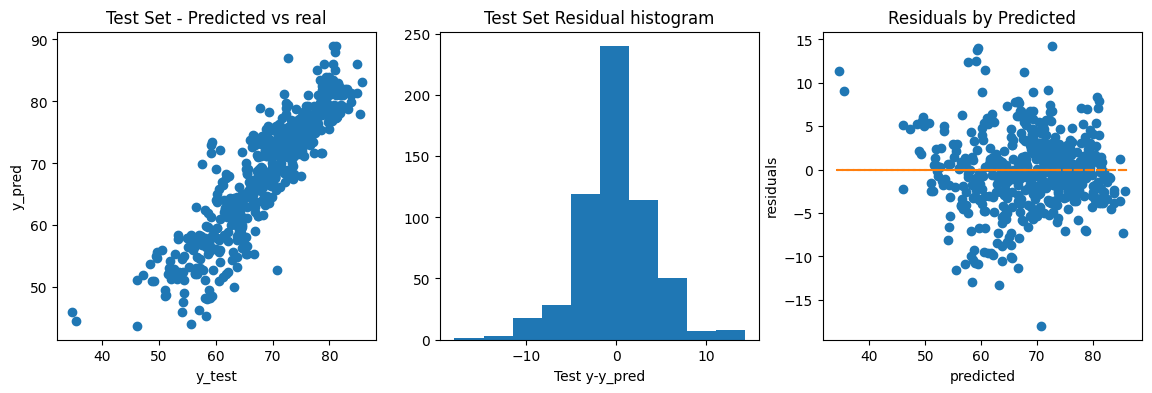

In [85]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y2_pred, y2_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y2_test - y2_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y2_pred,y2_test - y2_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y2_pred)),linestyle='dashed')

# Error metrics (X2, y2)

In [86]:
print(mse(y2_test,y2_pred))
print(mae(y2_test,y2_pred))

16.422575702188926
2.958726287564941


In [87]:
R2_2=r2_score(y2_test,y2_pred)
R2_2

0.8105102694145473

# Cross validation (X2, y2)

In [222]:
scores2=cross_val_score(model2, X2_train_scaled, y2_train, cv = 5)
scores2

array([0.81225427, 0.82636868, 0.78193953, 0.78345571, 0.80762642])

In [223]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.80 accuracy with a standard deviation of 0.02


# Defining X3, y3 (RFE)

In [90]:
X3 = X2

In [91]:
y3 = y2

# Data splitting (X3, y3)

In [92]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=42)

X3_train = pd.DataFrame(X3_train, columns=X3.columns)
X3_test  = pd.DataFrame(X3_test, columns=X3.columns)

# Recursive Feature Elimination (X3, y3)

In [93]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 17, step = 1, verbose = 1)
selector.fit(X3_train, y3_train)

kept_features = selector.get_support(indices = True) 
kept_features = list(X3_train.iloc[:,kept_features].columns)

X3_train_RFE = selector.transform(X3_train)
X3_test_RFE  = selector.transform(X3_test)

X3_train_RFE = pd.DataFrame(X3_train_RFE, columns=kept_features)
X3_test_RFE  = pd.DataFrame(X3_test_RFE, columns=kept_features)

print("Final selected features: ")
display(X3_train_RFE)

Final selected features: 


year  adult mortality  infant deaths  alcohol  percentage expenditure  \
0     2007.0            126.0            0.0     5.28              345.463714   
1     2001.0            152.0            0.0     3.81              150.743486   
2     2011.0            143.0            0.0    10.43                0.000000   
3     2013.0             13.0            3.0     1.29              594.645310   
4     2002.0             95.0            0.0     0.13              941.703687   
...      ...              ...            ...      ...                     ...   
2345  2011.0             59.0            0.0     6.91             3601.287457   
2346  2010.0            287.0            4.0     3.21               53.307827   
2347  2007.0            266.0           17.0     6.08               56.778587   
2348  2003.0             72.0            2.0     9.30             3519.258515   
2349  2005.0             34.0            7.0     1.07                5.064689   

      hepatitis b  measles   bmi  polio  total expenditure  diphtheria  \
0            96.0      0.0  25.5   98.0               4.30        98.0   
1            92.0      0.0  22.1   91.0               5.19         9.0   
2            99.0      0.0  44.5   99.0               7.58        99.0   
3            98.0     16.0  59.3   98.0               7.26        98.0   
4            99.0      0.0  28.0   99.0               3.40        94.0   
...           ...      ...   ...    ...                ...         ...   
2345         82.0      3.0  68.0   96.0               9.60        96.0   
2346         83.0     26.0  23.1   82.0               6.70        83.0   
2347         92.0      0.0   4.7   62.0               5.56        63.0   
2348         95.0  10982.0  57.0   97.0               8.17        96.0   
2349         96.0     19.0  13.9   96.0               2.97        96.0   

      hiv/aids  population  thinness 1-19 years  \
0          0.6    486438.0                  8.1   
1          0.8    443716.0                  9.4   
2          0.1   1386542.0                  4.3   
3          0.1   1114558.0                  6.4   
4          0.1   1386542.0                  6.7   
...        ...         ...                  ...   
2345       0.1    416268.0                  0.8   
2346       5.9    155588.0                  8.0   
2347       2.7   9556889.0                  4.2   
2348       0.1   5731323.0                  0.5   
2349       1.6     39697.0                  9.4   

      income composition of resources  schooling  status_Developing  
0                               0.602       11.9                1.0  
1                               0.562       11.0                1.0  
2                               0.733       12.9                1.0  
3                               0.720       14.7                1.0  
4                               0.820       13.3                1.0  
...                               ...        ...                ...  
2345                            0.826       14.8                0.0  
2346                            0.405        8.9                1.0  
2347                            0.458        8.4                1.0  
2348                            0.841       15.4                0.0  
2349                            0.000        5.4                1.0  

[2350 rows x 17 columns]

# Standardizing Data (X3, y3)

In [94]:
std_scaler=StandardScaler().fit(X3_train_RFE)   

X3_train_scaled=std_scaler.transform(X3_train_RFE)


In [95]:
X3_test_scaled=std_scaler.transform(X3_test_RFE)

# Fitting model (Linear Regression, X3, y3, RFE)

In [96]:
model3=LinearRegression()    
model3.fit(X3_train_scaled, y3_train)

LinearRegression()

# Feature importance (Linear Regression, X3, y3, RFE)


In [205]:
feature_names3 = X3_train.columns
feature_names3 = list(feature_names3)

In [206]:
df2 = pd.DataFrame(list(zip(feature_names3, model3.coef_)))
df2.columns = ['columns_name', 'score_feature_importance']
df2.sort_values(by=['score_feature_importance'], ascending = False)

columns_name  score_feature_importance
15                        schooling                  2.136879
14  income composition of resources                  1.426846
10                       diphtheria                  1.129300
7                               bmi                  0.850547
8                             polio                  0.729888
4            percentage expenditure                  0.502258
12                       population                  0.109341
9                 total expenditure                  0.069410
3                           alcohol                  0.050646
0                              year                 -0.012503
2                     infant deaths                 -0.120746
13              thinness 1-19 years                 -0.309461
6                           measles                 -0.428976
5                       hepatitis b                 -0.494845
16                status_Developing                 -0.640441
11                         hiv/aids                 -2.463614
1                   adult mortality                 -2.652416

# Making prediction (X3, y3)

In [97]:
y3_pred=model3.predict(X3_test_scaled)   

y3_pred_train=model2.predict(X3_train_scaled)

# Evaluating model performance (X3, y3)

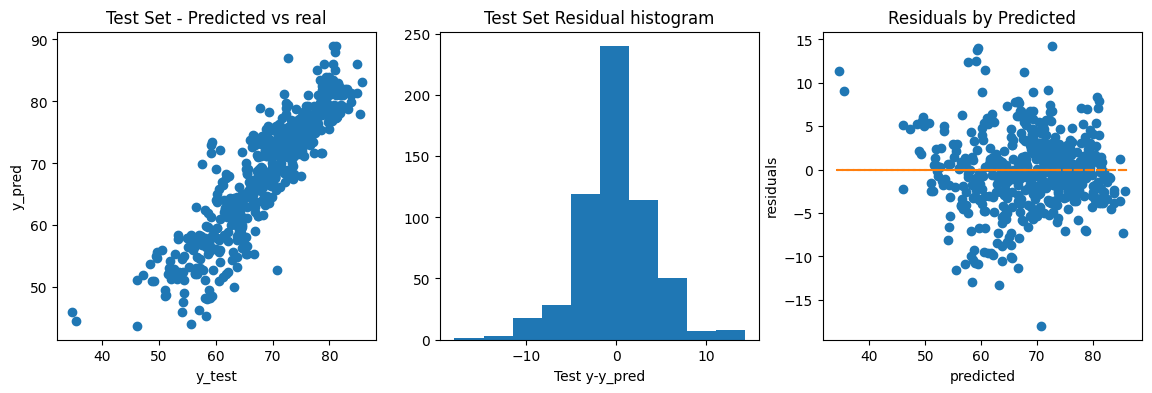

In [98]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y3_pred, y3_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y3_test - y3_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y3_pred,y3_test - y3_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y2_pred)),linestyle='dashed')

# Error metrics (X3, y3)

In [99]:
print(mse(y3_test,y3_pred))
print(mae(y3_test,y3_pred))

16.422575702188926
2.958726287564941


In [100]:
R2_3=r2_score(y3_test,y3_pred)
R2_3

0.8105102694145473

# Cross validation (X3, y3)

In [101]:
scores3=cross_val_score(model3, X3_train, y3_train, cv = 5)
scores3

array([0.81225427, 0.82636868, 0.78193953, 0.78345571, 0.80762642])

In [102]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

0.80 accuracy with a standard deviation of 0.02


# Defining X4, y4 (KNN Regression)

In [103]:
X4 = X3

In [104]:
y4 = y3

# Data splitting (X4, y4)

In [105]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20, random_state=42)

X4_train = pd.DataFrame(X4_train, columns=X4.columns)
X4_test  = pd.DataFrame(X4_test, columns=X4.columns)

# Recursive Feature Elimination (X3, y3)

In [106]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 17, step = 1, verbose = 1)
selector.fit(X4_train, y4_train)

kept_features = selector.get_support(indices = True) 
kept_features = list(X4_train.iloc[:,kept_features].columns)

X4_train_RFE = selector.transform(X4_train)
X4_test_RFE  = selector.transform(X4_test)

X4_train_RFE = pd.DataFrame(X4_train_RFE, columns=kept_features)
X4_test_RFE  = pd.DataFrame(X4_test_RFE, columns=kept_features)

print("Final selected features: ")
display(X4_train_RFE)

Final selected features: 


year  adult mortality  infant deaths  alcohol  percentage expenditure  \
0     2007.0            126.0            0.0     5.28              345.463714   
1     2001.0            152.0            0.0     3.81              150.743486   
2     2011.0            143.0            0.0    10.43                0.000000   
3     2013.0             13.0            3.0     1.29              594.645310   
4     2002.0             95.0            0.0     0.13              941.703687   
...      ...              ...            ...      ...                     ...   
2345  2011.0             59.0            0.0     6.91             3601.287457   
2346  2010.0            287.0            4.0     3.21               53.307827   
2347  2007.0            266.0           17.0     6.08               56.778587   
2348  2003.0             72.0            2.0     9.30             3519.258515   
2349  2005.0             34.0            7.0     1.07                5.064689   

      hepatitis b  measles   bmi  polio  total expenditure  diphtheria  \
0            96.0      0.0  25.5   98.0               4.30        98.0   
1            92.0      0.0  22.1   91.0               5.19         9.0   
2            99.0      0.0  44.5   99.0               7.58        99.0   
3            98.0     16.0  59.3   98.0               7.26        98.0   
4            99.0      0.0  28.0   99.0               3.40        94.0   
...           ...      ...   ...    ...                ...         ...   
2345         82.0      3.0  68.0   96.0               9.60        96.0   
2346         83.0     26.0  23.1   82.0               6.70        83.0   
2347         92.0      0.0   4.7   62.0               5.56        63.0   
2348         95.0  10982.0  57.0   97.0               8.17        96.0   
2349         96.0     19.0  13.9   96.0               2.97        96.0   

      hiv/aids  population  thinness 1-19 years  \
0          0.6    486438.0                  8.1   
1          0.8    443716.0                  9.4   
2          0.1   1386542.0                  4.3   
3          0.1   1114558.0                  6.4   
4          0.1   1386542.0                  6.7   
...        ...         ...                  ...   
2345       0.1    416268.0                  0.8   
2346       5.9    155588.0                  8.0   
2347       2.7   9556889.0                  4.2   
2348       0.1   5731323.0                  0.5   
2349       1.6     39697.0                  9.4   

      income composition of resources  schooling  status_Developing  
0                               0.602       11.9                1.0  
1                               0.562       11.0                1.0  
2                               0.733       12.9                1.0  
3                               0.720       14.7                1.0  
4                               0.820       13.3                1.0  
...                               ...        ...                ...  
2345                            0.826       14.8                0.0  
2346                            0.405        8.9                1.0  
2347                            0.458        8.4                1.0  
2348                            0.841       15.4                0.0  
2349                            0.000        5.4                1.0  

[2350 rows x 17 columns]

# Power transforming data (X4, y4)

In [209]:
trans = PowerTransformer()
trans.fit(X4_train)

PowerTransformer()

In [210]:
X4_train_scaled = trans.transform(X4_train)
X4_test_scaled  = trans.transform(X4_test)

# Fitting model (KNN Regression, X4, y4)

In [211]:
model4 = KNeighborsRegressor(n_neighbors=2)

In [212]:
model4.fit(X4_train_scaled, y4_train)

KNeighborsRegressor(n_neighbors=2)

# Making prediction (X4, y4)

In [213]:
y4_pred_train = model4.predict(X4_train_scaled)
y4_pred  = model4.predict(X4_test_scaled)

# Evaluating model performance (X4, y4)

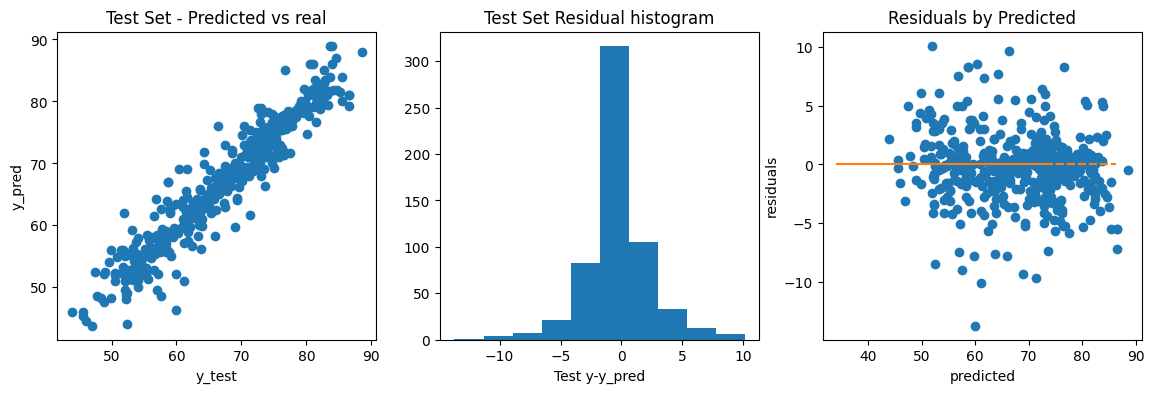

In [214]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y4_pred, y4_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y4_test - y4_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y4_pred,y4_test - y4_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y4_pred)),linestyle='dashed')

# Error metrics (X4, y4)

In [215]:
print(mse(y4_test,y4_pred))
print(mae(y4_test,y4_pred))

6.941692176870748
1.7187074829931968


In [216]:
R2_4=r2_score(y4_test,y4_pred)
R2_4

0.9199041974745131

# Cross validation (X4, y4)

In [218]:
scores4=cross_val_score(model4, X4_train_scaled, y4_train, cv = 5)
scores4

array([0.92088415, 0.90030245, 0.89157348, 0.89512581, 0.89108005])

In [219]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores4.mean(), scores4.std()))

0.90 accuracy with a standard deviation of 0.01


# Defining X5, y5 (Decision Tress Regression)

In [134]:
X5 = X4

In [136]:
y5 = y4

# Data splitting (X5, y5)

In [139]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.20, random_state=42)

X5_train = pd.DataFrame(X5_train, columns=X5.columns)
X5_test  = pd.DataFrame(X5_test, columns=X5.columns)

# Standardizing Data (X5, y5)

- Not needed because using decision tree

# Fitting model (Decision Tree Regression, X5, y5)

In [150]:
model5 = DecisionTreeRegressor(max_depth=3)

model5.fit(X5_train, y5_train)



DecisionTreeRegressor(max_depth=3)

# Making prediction (X5, y5)

In [151]:
y5_pred_train = model5.predict(X5_train)
y5_pred  = model5.predict(X5_test)

# Evaluating model performance (X5, y5)

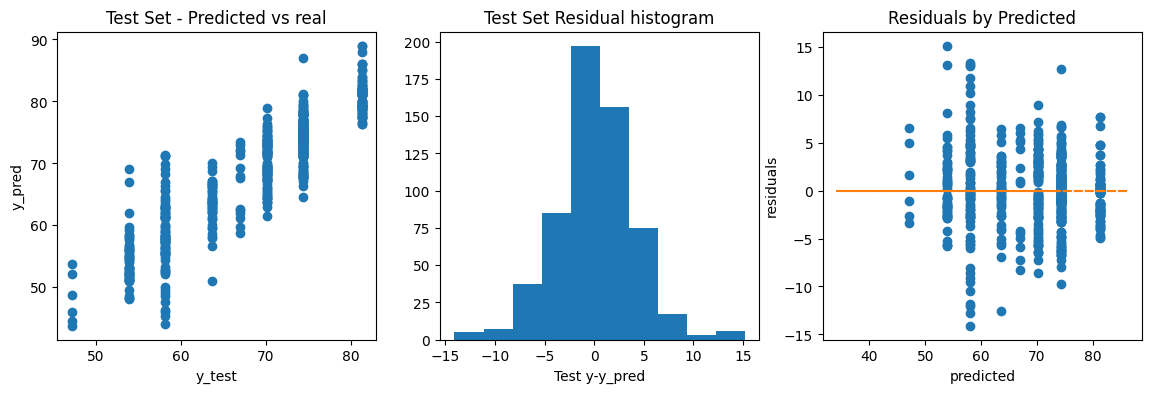

In [152]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y5_pred, y5_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y5_test - y5_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y5_pred,y5_test - y5_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y5_pred)),linestyle='dashed')

# Error metrics (X5, y5)

In [154]:
print(mse(y5_test,y5_pred))
print(mae(y5_test,y5_pred))

15.008701598337886
2.9080986654363308


In [155]:
R2_5=r2_score(y4_test,y4_pred)
R2_5

0.9235307380989162

# Cross validation (X5, y5)

In [227]:
scores5=cross_val_score(model5, X5_train, y5_train, cv = 5)
scores5

array([0.84226133, 0.85097378, 0.82446537, 0.80517514, 0.7685041 ])

In [228]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores5.mean(), scores5.std()))

0.82 accuracy with a standard deviation of 0.03


# Defining X6, y6 (Random Forest Regression)

In [162]:
X6 = X5

In [163]:
y6 = y5

# Data splitting (X6, y6)

In [165]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.20, random_state=42)

X6_train = pd.DataFrame(X6_train, columns=X5.columns)
X6_test  = pd.DataFrame(X6_test, columns=X5.columns)

# Standardizing Data (X6, y6)

- Not needed because using decision tree

# Fitting model (Random Forest Regression, X6, y6)

In [170]:
model6 = RandomForestRegressor(n_estimators=100)

model6.fit(X6_train, y6_train)



RandomForestRegressor()

# Feature importance (Random Forest Regression, X6, y6)


In [ ]:
feature_names6 = X6_train.columns
feature_names6 = list(feature_names6)

In [200]:
df6 = pd.DataFrame(list(zip(feature_names6, model6.feature_importances_)))
df6.columns = ['columns_name', 'score_feature_importance']
df6.sort_values(by=['score_feature_importance'], ascending = False)

columns_name  score_feature_importance
11                         hiv/aids                  0.593364
14  income composition of resources                  0.157994
1                   adult mortality                  0.147995
7                               bmi                  0.019460
2                     infant deaths                  0.013774
15                        schooling                  0.013141
13              thinness 1-19 years                  0.011913
3                           alcohol                  0.007266
0                              year                  0.006740
9                 total expenditure                  0.005358
6                           measles                  0.004737
4            percentage expenditure                  0.004683
8                             polio                  0.004184
10                       diphtheria                  0.003588
12                       population                  0.003487
5                       hepatitis b                  0.002030
16                status_Developing                  0.000287

# Making prediction (X6, y6)

In [171]:
y6_pred_train = model6.predict(X6_train)
y6_pred  = model6.predict(X6_test)

# Evaluating model performance (X6, y6)

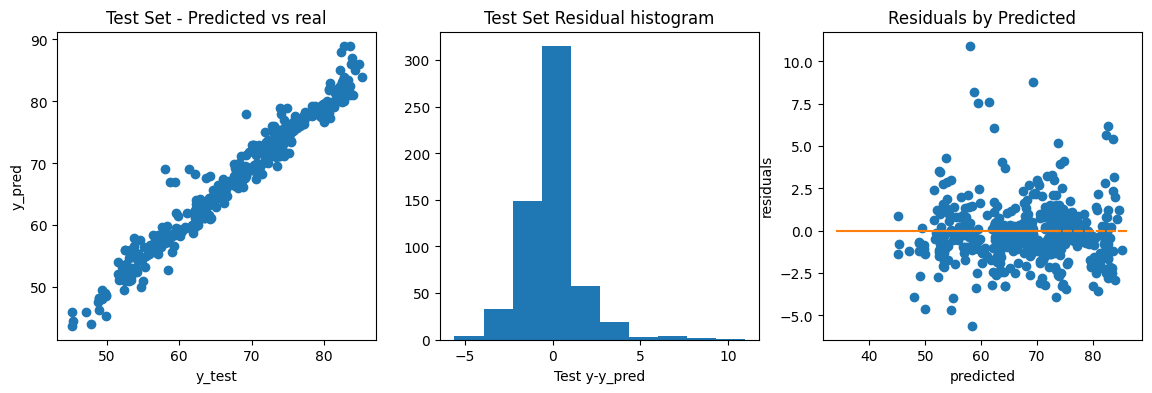

In [172]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y6_pred, y6_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y6_test - y6_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y6_pred,y6_test - y6_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y6_pred)),linestyle='dashed')

# Error metrics (X6, y6)

In [173]:
print(mse(y6_test,y6_pred))
print(mae(y6_test,y6_pred))

2.733742576530613
1.0888214285714293


In [174]:
R2_6=r2_score(y6_test,y6_pred)
R2_6

0.9684570706988599

# Cross validation (X6, y6)

In [226]:
scores6=cross_val_score(model6, X6_train, y6_train, cv = 10)
scores6

array([0.96872407, 0.95649205, 0.96892878, 0.96327596, 0.95949278,
       0.95507941, 0.9545969 , 0.95118478, 0.93407534, 0.96133898])

In [179]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores6.mean(), scores6.std()))

0.96 accuracy with a standard deviation of 0.01


In [189]:
feature_names6 = X6_train.columns
feature_names6 = list(feature_names6)


In [190]:
df6 = pd.DataFrame(list(zip(feature_names6, model6.feature_importances_)))
df6.columns = ['columns_name', 'score_feature_importance']
df6.sort_values(by=['score_feature_importance'], ascending = False)

columns_name  score_feature_importance
11                         hiv/aids                  0.593364
14  income composition of resources                  0.157994
1                   adult mortality                  0.147995
7                               bmi                  0.019460
2                     infant deaths                  0.013774
15                        schooling                  0.013141
13              thinness 1-19 years                  0.011913
3                           alcohol                  0.007266
0                              year                  0.006740
9                 total expenditure                  0.005358
6                           measles                  0.004737
4            percentage expenditure                  0.004683
8                             polio                  0.004184
10                       diphtheria                  0.003588
12                       population                  0.003487
5                       hepatitis b                  0.002030
16                status_Developing                  0.000287

# Defining X7, y7 (Random Forest Regression w/ Feature Selection X6, y6)

In [234]:
X7 = X6[['hiv/aids','income composition of resources','adult mortality']].copy()

In [242]:
X7.isna().any()

hiv/aids                           False
income composition of resources    False
adult mortality                    False
dtype: bool

In [237]:
y7 = y6

# Data splitting (X7, y7)

In [244]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.20, random_state=42)

X7_train = pd.DataFrame(X7_train, columns=X7.columns)
X7_test  = pd.DataFrame(X7_test, columns=X7.columns)

# Fitting model (Random Forest Regression, X7, y7 w/ Feature Selection X6, y6)

In [245]:
model7 = RandomForestRegressor(n_estimators=100)

model7.fit(X7_train, y7_train)



RandomForestRegressor()

# Feature importance (Random Forest Regression, X7, y7 w/ Feature Selection X6, y6)


In [254]:
feature_names7 = X7_train.columns
feature_names7 = list(feature_names7)

In [255]:
df6 = pd.DataFrame(list(zip(feature_names7, model7.feature_importances_)))
df6.columns = ['columns_name', 'score_feature_importance']
df6.sort_values(by=['score_feature_importance'], ascending = False)

columns_name  score_feature_importance
0                         hiv/aids                  0.605639
1  income composition of resources                  0.220438
2                  adult mortality                  0.173923

# Making prediction (X7, y7)

In [247]:
y7_pred_train = model7.predict(X7_train)
y7_pred  = model7.predict(X7_test)

# Evaluating model performance (X7, y7)

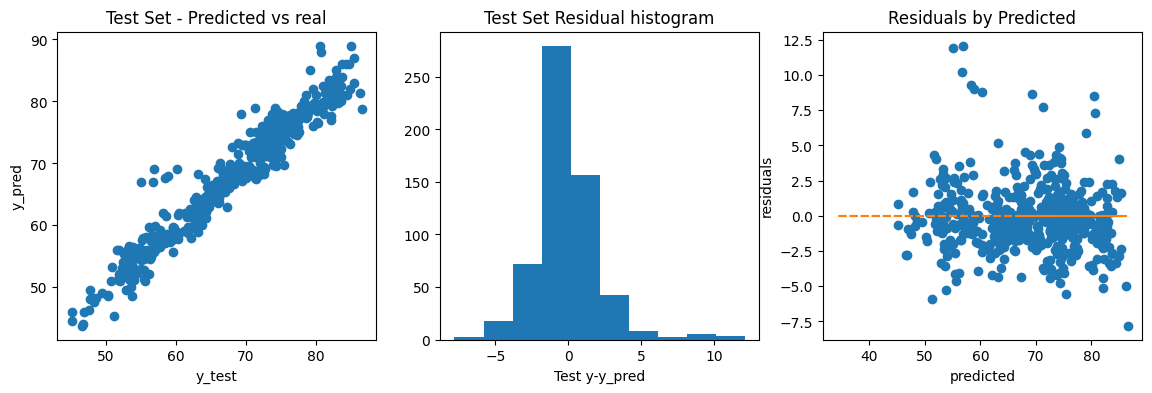

In [248]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y7_pred, y7_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y7_test - y7_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y7_pred,y7_test - y7_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y7_pred)),linestyle='dashed')

# Error metrics (X7, y7)

In [250]:
print(mse(y7_test,y7_pred))
print(mae(y7_test,y7_pred))

4.873536531901014
1.5003930177626577


In [251]:
R2_7=r2_score(y7_test,y7_pred)
R2_7

0.9437673394737224

# Cross validation (X7, y7)

In [252]:
scores7=cross_val_score(model7, X7_train, y7_train, cv = 10)
scores7

array([0.95198205, 0.94410488, 0.95554476, 0.94755887, 0.94473846,
       0.94491057, 0.93749956, 0.94367024, 0.91765164, 0.94730002])

In [253]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores7.mean(), scores7.std()))

0.94 accuracy with a standard deviation of 0.01


# "20 years means 20 Brazils, look at others on kaggle"